<a href="https://colab.research.google.com/github/abhinav-exp/Forecasting-CryptoCurrency-Prices/blob/master/CFLANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
GitHubDataLink = 'https://raw.githubusercontent.com/abhinav-exp/Forecasting-CryptoCurrency-Prices/master/Datasets/'
InputFileLink = GitHubDataLink + 'DataBTC2017.csv'
data1 = pd.read_csv(InputFileLink, header=0, index_col=0)

In [3]:
def split_sequence(sequence, n_steps):
  X= list()
  for i in range(len(sequence) - n_steps):
    end_ix = i + n_steps
    seq_x= sequence.values[i:end_ix, 0]
    X.append(seq_x)
  return pd.DataFrame(X)

data2 = split_sequence(data1, 10)
print(data2.shape)
print(data2)

(771, 10)
           0        1        2         3         4         5         6  \
0    2515.25  2596.98  2725.08   2643.35   2679.99   2690.76   2574.84   
1    2596.98  2725.08  2643.35   2679.99   2690.76   2574.84   2505.61   
2    2725.08  2643.35  2679.99   2690.76   2574.84   2505.61   2407.91   
3    2643.35  2679.99  2690.76   2574.84   2505.61   2407.91   2575.75   
4    2679.99  2690.76  2574.84   2505.61   2407.91   2575.75   2553.12   
..       ...      ...      ...       ...       ...       ...       ...   
766  9751.24  9880.67  9841.96   9468.92   9549.70   9503.32   9580.00   
767  9880.67  9841.96  9468.92   9549.70   9503.32   9580.00  10099.00   
768  9841.96  9468.92  9549.70   9503.32   9580.00  10099.00  10417.24   
769  9468.92  9549.70  9503.32   9580.00  10099.00  10417.24  10533.07   
770  9549.70  9503.32  9580.00  10099.00  10417.24  10533.07  10820.75   

            7         8         9  
0     2505.61   2407.91   2575.75  
1     2407.91   2575.75   255

In [4]:
train_x = data2.iloc[:int(0.85*len(data2)), :9]
train_y = data2.iloc[:int(0.85*len(data2)), 9:10]
test_x = data2.iloc[int(0.85*len(data2)):, :9]
test_y = data2.iloc[int(0.85*len(data2)):, 9:10]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(655, 9)
(655, 1)
(116, 9)
(116, 1)


In [8]:
class CFLANN():
  def __init__(self):
    self.weight_matrix = 2*np.random.random((9*4, 1)) - 1
  
  def func_x(self, x):
    orginal_x = x
    func1_x = 2*(x ** 2) - 1
    func2_x = 4*(x ** 3) - 3*x
    func3_x = 8*(x ** 4) - 8*(x ** 2) + 1
    functioned_x = np.hstack((x, func1_x, func2_x, func3_x))
    return functioned_x

  def tanh_derivative(self, x):
    return 1.0 - (np.tanh(x) ** 2)

  def forward_propagation(self, x):
    funced_x = self.func_x(x)
    return np.dot(funced_x, self.weight_matrix)

  def train(self, train_x, train_y, epochs):
    for iteration in range(epochs):
      y = self.forward_propagation(train_x)

      error = train_y - y

      adjustment = np.dot(self.func_x(train_x).T, error * self.tanh_derivative(y))

      self.weight_matrix += adjustment
      # for w in self.weight_matrix:
      #   print(str(round(w[0], 2)) + " ", end="")
      # print("epoch ")

In [19]:
model = CFLANN()
model.train(train_x = train_x, train_y = train_y, epochs = 100)
preds = model.forward_propagation(test_x)
print(preds.shape)

(116, 1)


In [20]:
preds[:, 0]

array([-7.62797648e+15, -7.28728132e+15, -7.79347545e+15, -9.85341615e+15,
       -9.48428099e+15, -9.07359609e+15, -9.79638896e+15, -9.05291395e+15,
       -8.19432063e+15, -8.74781443e+15, -8.84567129e+15, -8.84269199e+15,
       -9.74301516e+15, -9.86347724e+15, -8.69784619e+15, -7.73723561e+15,
       -9.80880977e+15, -1.05396854e+16, -1.03340194e+16, -1.13832368e+16,
       -1.09550010e+16, -9.88584861e+15, -9.93608135e+15, -1.09720661e+16,
       -1.00728123e+16, -8.63758146e+15, -1.03061403e+16, -1.21237783e+16,
       -1.41641246e+16, -1.90385239e+16, -1.82385183e+16, -2.73058126e+16,
       -1.97701230e+16, -2.60511356e+16, -2.88264837e+16, -1.54069903e+16,
       -1.96846901e+16, -2.66049240e+16, -3.88795257e+16, -6.34749412e+16,
       -4.99043003e+16, -4.30779478e+16, -4.58545505e+16, -4.00806564e+16,
       -5.28389603e+16, -5.85422085e+16, -6.61765198e+16, -5.33664583e+16,
       -3.46429796e+16, -5.10552051e+16, -4.70978148e+16, -6.36843940e+16,
       -7.46741450e+16, -

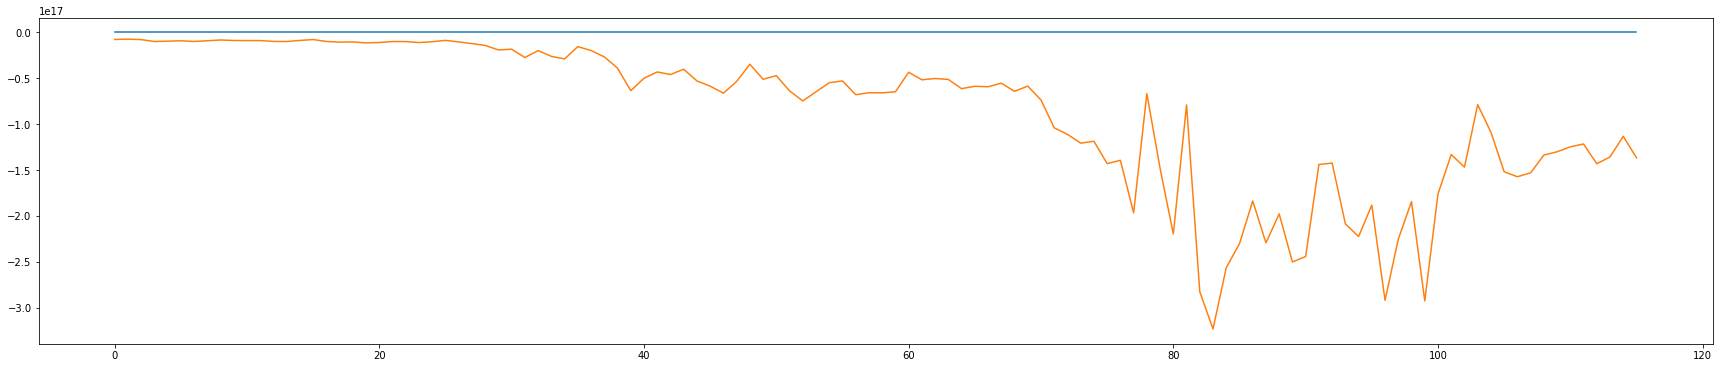

In [21]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(preds)
plt.show()
     